In [258]:
%load_ext autoreload
%autoreload 2
import numpy as np
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1))
gnbg_tasks.append(GNBGTask(2))
gnbg_tasks.append(GNBGTask(3))

In [ ]:
crossover = ArithmeticCrossover()
mutation = AdditiveMutation(bound=100.0, delta=2.0)
rmp = NormalRMP()
pop_size = 3 * 200
indi_len = 30
bound = 100.0
a = AMFEA(pop_size, indi_len, bound, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 75256.14374706672
Mean Fitness: 169105.11264460147

Task 1:
Best Fitness: -701.3708295117302
Mean Fitness: -701.3127392947869

Task 2:
Best Fitness: 42508649593.13594
Mean Fitness: 91673252582.42227



In [305]:
bfs, mfs = a.fit(500, monitor_rate=50)

Gen 0
Task 0:
Best Fitness: 75256.14374706672
Mean Fitness: 157764.4122525772

Task 1:
Best Fitness: -701.3708295117302
Mean Fitness: -701.3184445910518

Task 2:
Best Fitness: 42508649593.13594
Mean Fitness: 85782862117.83208

Gen 50
Task 0:
Best Fitness: 21269.89453125
Mean Fitness: 43906.99602434602

Task 1:
Best Fitness: -701.4768233803698
Mean Fitness: -701.4293409163752

Task 2:
Best Fitness: 11149069312.0
Mean Fitness: 20045854479.746048

Gen 100
Task 0:
Best Fitness: 11114.5986328125
Mean Fitness: 23330.079404221597

Task 1:
Best Fitness: -701.517822265625
Mean Fitness: -701.471046288677

Task 2:
Best Fitness: 6875403776.0
Mean Fitness: 11297373444.21351

Gen 150
Task 0:
Best Fitness: 10870.9375
Mean Fitness: 15643.604413339815

Task 1:
Best Fitness: -701.519775390625
Mean Fitness: -701.4954146351284

Task 2:
Best Fitness: 5600148480.0
Mean Fitness: 8025721505.427579

Gen 200
Task 0:
Best Fitness: 6531.7841796875
Mean Fitness: 11379.908967294796

Task 1:
Best Fitness: -701.53228

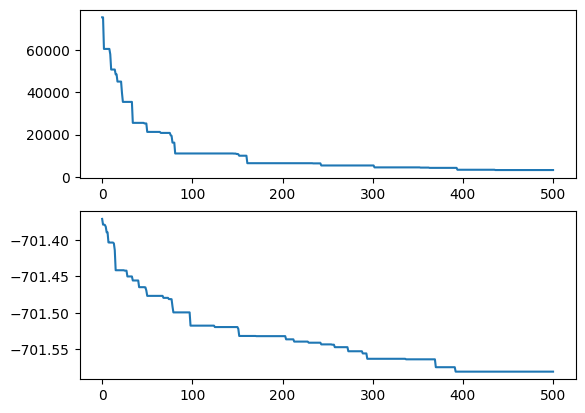

In [306]:
fig, axes = plt.subplots(2)
axes[0].plot(bfs[0])
axes[1].plot(bfs[1])

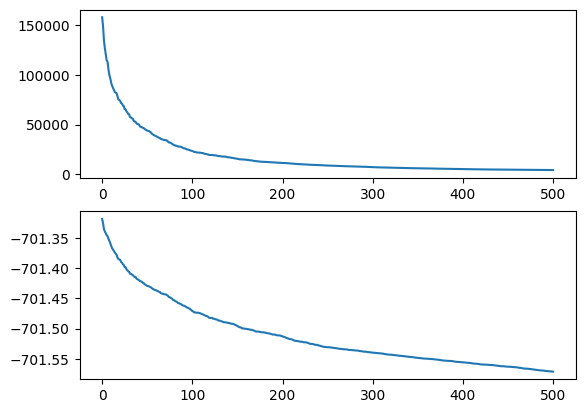

In [307]:
fig, axes = plt.subplots(2)
axes[0].plot(mfs[0])
axes[1].plot(mfs[1])

In [269]:
gnbg_task = GNBGTask(2)
x = np.random.uniform(-100, 100, size=30)
gnbg_task.fitness(x)

array([-701.29567116])